Missing values:
 message_length    0
response_time     0
case_type         0
dtype: int64
Evaluation Metrics:
Accuracy : 0.3500
Precision: 0.5015
Recall   : 0.3500


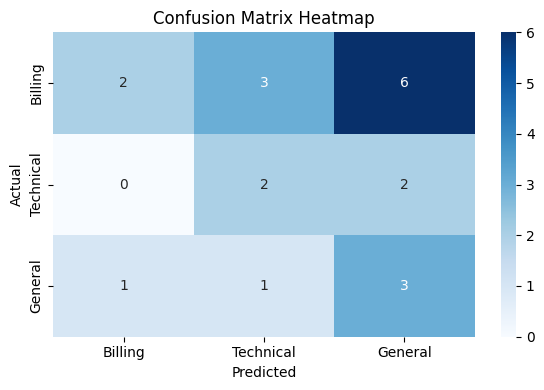


Classification Report:
              precision    recall  f1-score   support

     Billing       0.67      0.18      0.29        11
   Technical       0.33      0.50      0.40         4
     General       0.27      0.60      0.38         5

    accuracy                           0.35        20
   macro avg       0.42      0.43      0.35        20
weighted avg       0.50      0.35      0.33        20



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import LabelEncoder

# Step 1: Load data
data = pd.read_csv("/content/support_cases.csv")

# Step 2: Check for missing values
print("Missing values:\n", data.isnull().sum())

# Step 3: Drop missing values
data.dropna(inplace=True)

# Step 4: Encode case_type labels into numeric format
label_mapping = {'billing': 0, 'technical': 1, 'general': 2}
data = data[data['case_type'].isin(label_mapping)]  # Only valid labels
data['label_encoded'] = data['case_type'].map(label_mapping)

# Step 5: Define features and target
X = data[['message_length', 'response_time']]
y = data['label_encoded']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 7: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print("Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Billing', 'Technical', 'General']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

# Step 11: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=labels))


